University of Bonn | SoSe 2020 | Microeconometrics | Satwika Vysetty
# Replication of [High-Dimensional Methods and Inference on Structural and Treatment Effects](https://www.aeaweb.org/articles?id=10.1257/jep.28.2.29)
---

## **Table of Contents**

* [Introduction](#sec1)
* [Theoretical Background](#sec2)
    * [Approximately Sparse Regression Models](#sec2_1)
    * [Model Selection when the goal is causal inference](#sec2_2)
* [Estimating the Impact of Eminent Domain on House Prices](#sec3)
    * [Introduction](#sec3_1)
    * [Identification](#sec3_2)
    * [Empirical Strategy](#sec3_3)
    * [Replication](#sec3_4)
    * [Additional](#sec3_5)
* [Estimating the Effect of Legalized Abortion on Crime](#sec4)
    * [Introduction](#sec4_1)
    * [Identification](#sec4_2)
    * [Empirical Strategy](#sec4_3)
    * [Replication](#sec4_4)
    * [Additional](#sec4_5)
* [Estimating the Effect of Institutions on Output](#sec5)
    * [Introduction](#sec5_1)
    * [Identification](#sec5_2)
    * [Empirical Strategy](#sec5_3)
    * [Replication](#sec5_4)
    * [Additional](#sec5_5)
* [Conclusion](#sec6)
* [References](#sec6)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from linearmodels import IV2SLS
from collections import OrderedDict
import statsmodels.formula.api as smf
from IPython.display import display, Image
from linearmodels import FirstDifferenceOLS
from sklearn.linear_model import LassoCV, Lasso
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **1. Introduction** <a class="anchor" id="sec1"></a>
---

High-dimensional data is fairly common nowadays. It can be defined as a data set where the number of regressors/predictors (p) is greater than the number of observations (n). High-dimensional data could be a result of two phenomena: <br>
1. When the number of characteristics per observation is larger than the sample size. <br>  
2. When the researcher includes a large number of variable transformations in the regression.  <br>
**What if $p>n$?** <br>
When the number of regressors is greater than the number of observations, the regression cannot be identified using OLS <br>
**What if $p=n$?** <br>
When the number of regressors is equal to the number of observations, the OLS fits the data perfectly such that $R^2=1$ <br>
**What if $p<n$?** <br>
When the number of regressors is smaller than the number of observations, we will not only be able to identify the model but also avoid overfitting issues as otherwise. When we have high-dimensional data, we need to reduce the dimensions (regularize) such that $p<n$ to draw meaningful conclusions from it.

## **2. Theoretical Background** <a class="anchor" id="sec2"></a>
---

#### **2.1. Approximately Sparse Regression Models** <a class="anchor" id="sec2_1"></a><br> 
The authors consider the following model to forecast the outcome ($y_i$) and treat $g(w_i)$ as a high-dimensional, linear model such that <br>
<br>
$$y_i=g(w_i)+\zeta_i \hspace{0.1cm}, \hspace{0.25cm} i=1,...n \hspace{0.25cm} \& \hspace{0.25cm} E(\zeta_i|w_i)=0$$ <br>
$$g(w_i) =\sum_{j=1}^{p}{\beta_jx_{i,j}}+r_{p,i} \hspace{0.25cm}$$
<div style="text-align: justify">$r_{p,i}$ is an approximation error. To identify the model, avoid overfitting and for better prediction ability, we need to regularize the function $g(\cdot)$. Typically, researchers regularize based on economic theory and intuition. However, the question of the correct variables and the transformations being chosen is left unanswered. Another approach to reduce dimensions is the approximate sparsity of the high-dimensional linear model. </div> 
<blockquote>“Approximate sparsity imposes a restriction that only $s$ variables among all of $x_{i,j}$, where $s$ is much smaller than $n$, have associated coefficients $\beta_j$ that are different from $0$, while permitting a nonzero approximation error $r_{p,i}$.” </blockquote>
This implies only s of the p regressors have coefficients that are not equal to zero such that $s<p<n$. One of the methods for estimating the parameter of sparse high-dimensional models is the Least Absolute Shrinkage and Selection Operator (LASSO). In this paper, the authors use a variant of LASSO estimator defined as: <br> 
<br>    
$$\hat{\beta}=\mathop{\rm argmax}\limits_b\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{i,j}b_j)^2+\lambda\sum_{j=1}^{p}|b_j|\gamma_j \hspace{0.25cm}$$
<br>  
$\lambda>0$ is the penalty and $\gamma_j$ are the penalty loadings. LASSO leads to some of the coefficients being set exactly to zero. Thus, it could be used in variable selection process by simply selecting the variables with nonzero coefficients. This addresses the problem when researcher doesn’t know a priori exactly which variables should be in the model. <br> 

#### **2.2. Model Selection when the goal is Causal Inference** <a class="anchor" id="sec2_2"></a><br> 
<div style="text-align: justify">The main aim of this paper is to use data mining procedures like LASSO for regularizing high-dimensional data to produce meaningful inferences. Authors stress that when the end goal is causal inference, LASSO should be used only for regularization purposes i.e, to only select variables whose coefficients are nonzero but not to interpret their coefficients directly. This is because: <br> 
1. Such procedures are designed for forecasting purposes and not to inference about model parameters <br> 
2. Model selection mistakes occur which then might lead to the problem of omitted variable bias <br>  
Thus, naively using results obtained from LASSO estimation might lead to inference problems. The authors explain when and how to use LASSO when the end goal of the researcher is causal inference about model parameters.</div> <br>

**Inference with Selection among many Instruments (z)**<br>
<br>
The authors consider the following linear instrumental variable model <br>
$$y_i=\alpha d_i+\varepsilon_i \hspace{0.25cm} where \hspace{0.25cm} d_i={z_i}^{'}\Pi+r_i+\nu_i$$ <br>
$$E(\varepsilon_i|z_i)=E(\nu_i|z_i,r_i)=0 \hspace{0.25cm} but \hspace{0.25cm} E(\varepsilon_i|\nu_i)\ne0$$ <br>
$d_i$ is an endogenous variable, $z_i$ is a p-dimensional vector of instruments and $r_i$ is an approximation error. In this scenario, the number of instruments is greater than the number of observations $(z>n)$ which calls for selection among the instruments to be able to estimate $\alpha$ <br>
<br>
*Choosing instruments in case of one endogenous variable:* <br>
Step 1: Use LASSO to regress $d_i$ (endogenous variable) on $z_i$ (instrumental variables) <br>
Step 2: Select the instrument(s) with nonzero coefficients from step 1 <br>
Step 3: Carry out standard 2SLS estimation using the selected instrument(s) from step 2 <br>
<br>
*Choosing instruments in case of more than one endogenous variable:* <br>
Step 1: Use LASSO to regress $d_i$ on $z_i$ for each of the endogenous variables <br>
Step 2: Select the instrument(s) with nonzero coefficients from step 1 for each of the endogenous variables <br>
Step 3: Carry out standard 2SLS estimation using the union of the selected instruments from step 2 <br>

**Inference with Selection among many Controls (c)**<br>
<br>
The authors consider the following linear model where a treatment variable, $d_i$, is taken as exogenous after conditioning on control variables <br>

$$\tag{1}\label{eq:1}y_i=\alpha d_i+ x_i^{'}\theta_y+r_{yi}+\zeta_i \hspace{0.1cm} ,\hspace{0.25cm} E(\zeta_i|d_i,x_i,r_{yi})=0$$
<div style="text-align: justify"> $x_i$ is a p-dimensional vector of controls and $r_{yi}$ is an approximation error. In this scenario, the number of controls is greater than the number of observations $(c>n)$ which calls for selection among the controls to be able to estimate $\alpha$ which is the effect of the treatment on the outcome. To ensure $\alpha$ remains in the model as it is the parameter of interest, one should exclude the treatment variable from the model selection process. Thus, regularization will only be carried out on the remaining exogenous variables (controls) which are referred to as ‘nuisance’ by the authors. </div> <br>

*Naïve Approach for Selection among many Controls (c)*  <br>
Step 1: Use LASSO to regress $y_i$ (outcome variable) on $x_i$ (control variables) <br>
Step 2: Select the control(s) with nonzero coefficients from step 1 <br>
Step 3: Carry out standard OLS estimation using the selected control(s) from step 2
<div style="text-align: justify">Running LASSO with $y_i$ on $x_i$ (step 1) only allows us to select those variables with nonzero coefficients associated to $y_i$. However, it ignores the relationship between treatment variable and controls leading to omitted variable bias. This is a major drawback of using the naïve approach. To understand the relationship between treatment variable and controls, the following equations are introduced by the authors </div> <br>

$$\tag{2}\label{eq:2}d_i=x_i^{'}\theta_d+r_{di}+\nu_i \hspace{0.1cm} ,\hspace{0.25cm} E(\nu_i|x_i,r_{di})=0$$ <br>

$$\tag{3}\label{eq:3}y_i=x_i^{'}(\alpha\theta_d+\theta_y)+(\alpha r_{di}+r_{yi})+(\alpha\nu_i+\zeta_i)=x_i^{'}\pi+r_{ci}+\varepsilon_i \hspace{0.1cm} ,\hspace{0.25cm} E(\varepsilon_i|x_i,r_{ci})=0$$ <br>

<div style="text-align: justify"> Substituting equation \eqref{eq:2} in \eqref{eq:1} will yield \eqref{eq:3}. $r_{ci}$ is a composite approximation error. Spare high-dimensional methods work best for predictions and not inferences. Equation \eqref{eq:1} represents a structural model where the goal to is to learn the causal inference. Whereas, equations \eqref{eq:2} and \eqref{eq:3} represent predictive relationships, which can be estimated by high-dimensional methods. Thus, to counter against the omitted variable bias, we use both the equations to select the controls. This is called the Post-Double Selection (PDS) LASSO.</div> <br>

*Post-Double-Selection (PDS) for Selection among many Controls (c)* <br>
Step 1: Use LASSO to regress $y_i$ (outcome variable) on $x_i$ (control variables) <br>
Step 2: Select the control(s) with nonzero coefficients from step 1 <br>
Step 3: Use LASSO to regress $d_i$ (treatment variable) on $x_i$ (control variables) <br>
Step 4: Select the control(s) with nonzero coefficients from step 3 <br>
Step 5: Carry out standard OLS estimation using the union of selected controls from step 2 and step 4 <br>

Figure 1 below is a simulation study from [Belloni, Chernozhukov, and Hansen (2014)](https://academic.oup.com/restud/article-abstract/81/2/608/1523757?redirectedFrom=fulltext). It compares the sampling distribution of the estimator of $\alpha$ from naïve approach and PDS approach. The left panel suffers from the omitted variable bias which is absent in the right panel.<br>

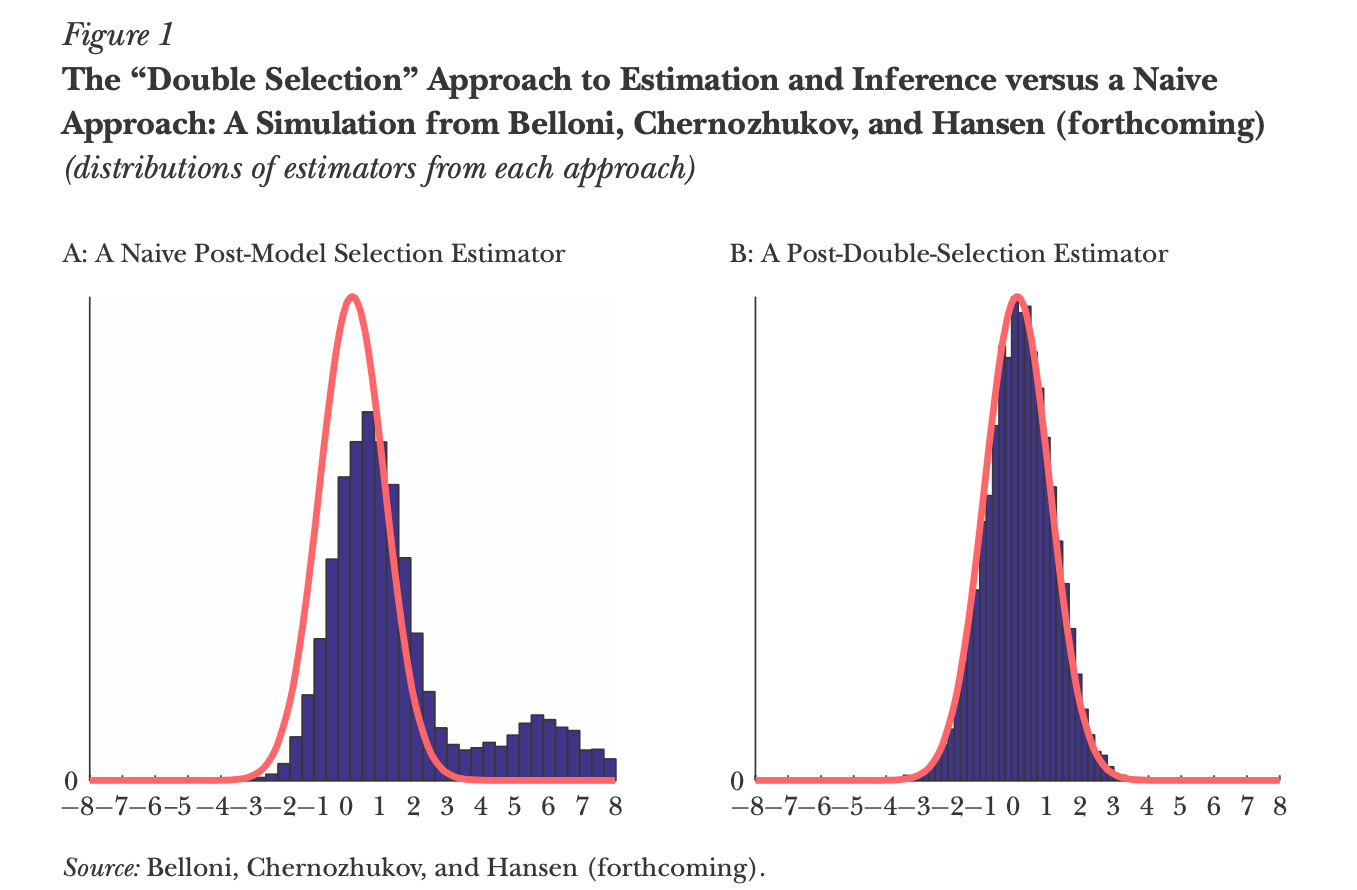

In [2]:
display(Image(filename='files/simulation.png',width=500))

The authors use three empirical examples in this paper and implement the LASSO for selecting controls and instruments in high-dimensional data.

## **3. Empirical Example 1: Estimating the Impact of Eminent Domain on House Prices** <a class="anchor" id="sec3"></a>

*Chen, Daniel L., and Susan Yeh. 2012. [“Growth under the Shadow of Expropriation? The Economic Impacts of Eminent Domain.”](http://www.sole-jole.org/13463.pdf)*

----

#### **3.1. Introduction** <a class="anchor" id="sec3_1"></a>

<div style="text-align: justify">
Eminent Domain also known as land acquisition or expropriation is the power of the government to take away private property, in exchange for some money, for public use. The US constitution gives this right to the government under the Fifth Amendment called the Takings Clause. Pro-plaintiff rulings are federal court rulings that say that the government seizure of a private property was unlawful. In the paper by Chen and Yeh (2012), they try to find the effect of such federal court decisions regarding eminent domain on housing prices. <br>
<br>
$$log(Case–Shiller_{ct})=\alpha\cdot TakingsLaw_{ct}+\beta_c+\beta_t+\gamma_{c}t+W_{ct}^{'}\delta+\varepsilon_{ct}$$
<br>
$Case–Shiller_{ct}$ is the average of the Case–Shiller home price index within circuit court $c$ at time $t$. $TakingsLaw_{ct}$ represents the number of pro-plaintiff appellate takings decisions in federal circuit court $c$ and year $t$. $W_{ct}$ are exogenous variables and $\beta_c$, $\beta_t$ and $\gamma_{c}t$ are respectively circuit-specific effects, time-specific effects, and circuit-specific time trends. The parameter of interest, $\alpha$, thus represents the effect of an additional pro-plaintiff decision on property prices.<br>
</div>

#### **3.2. Identification**  <a class="anchor" id="sec3_2"></a>

<div style="text-align: justify">The relationship between house prices and pro-plaintiff rulings is represented in the causal graph. The unobserved confounder makes it impossible to completely infer the effect of $X \longrightarrow Y$. In their paper, Chen and Yeh (2012), state that court decisions are endogenous. To counter this problem, they employ an instrumental variable approach and consider the characteristics of judges to be the instruments for judicial decisions. Judges are randomly assigned to three-judge panels. Since the characteristics of judges are unrelated to any other factors except for their judicial decisions that may affect the housing prices, the instruments are argued to be valid. As Z satisfies the exclusion restriction, it is used to infer the causal effect of X on Y.</div>
<br>
<img src= "files/CG1.png" width =500 height=400>

#### **3.3. Empirical Strategy**  <a class="anchor" id="sec3_3"></a>

<div style="text-align: justify">The characteristics of judges include their preferences over governments and individual property rights, gender, race, religion, political party affiliation, source of academic degrees, and if the judges had been promoted from a district court. The list of potential instruments not only included these characteristics for each judge but also interaction terms with various combinations of their functional forms. The data set consists of 183 observations, and 147 instrumental variables. The authors didn't provide any data on control variables. However, they mentioned that the original dataset used by Chen & Yeh (2012) consists of 72 control varibles. The model cannot be identified as $n(183)<p(219)$. To estimate this model for causal inference, there is a need to regularize. In this paper, authors use a LASSO variant for reducing the dimensions by selecting among many instruments. They estimate the following equation:</div><br>
$$CSIndex=\alpha\cdot NumProCase+\varepsilon$$<br>
<br>

|Variable Name|Type|Definition|
|---|---|---|
|CSIndex|Dependent|Case–Shiller home price index|
|NumProCase|Endogenous|Number of pro-plaintiff rulings|
|Z1xD|Instrument|Number of judicial panels with one or more Democrats|
|Z1xJDPSq|Instrument|Number of judicial panels with one or more members with JD from a public university squared|

<br>

Since the variable *TakingsLaw* is endogenous, they use two stage least square estimation first with an intuitive instrumental variable - Z1xD. A researcher could hypothesize that political affiliations of judges can predict their decision. Then the authors use their own function on STATA to select instruments using LASSO. For this, they regress the endogenous variable on all the instrumental variables and it returns one nonzero coefficient - Z1xJDPSq. They use this instrument and carry out two stage least square estimation with it. 

#### **3.4. Replication**  <a class="anchor" id="sec3_4"></a>

In [3]:
df1=pd.read_csv('data/ED.csv').drop(['Unnamed: 0','nControl'],axis=1) #loading the data 
df1.shape 

(183, 149)

In [4]:
df1[['CSIndex','NumProCase','Z1xD','Z1xJDPSq']].head() #main variables used in replication

,CSIndex,NumProCase,Z1xD,Z1xJDPSq
0,0.071146,0.119098,-0.024818,-0.026096
1,0.024656,-0.082198,0.010865,0.182470
2,0.051935,-0.001592,-0.540937,0.187084
3,-0.017423,-0.037161,0.164018,-0.129189
4,-0.057601,0.096159,0.495104,-0.096410


**TSLS estimation with instrument chosen on intuition**

In [5]:
#2SLS estimation with Z1xD as the instrument
IV_1=IV2SLS(1+ df1['CSIndex'],None,df1['NumProCase'],df1['Z1xD']).fit()
print(IV_1.first_stage)

    First Stage Estimation Results   
                           NumProCase
-------------------------------------
R-squared                      0.0047
Partial R-squared              0.0047
Shea's R-squared               0.0047
Partial F-statistic            0.5283
P-value (Partial F-stat)       0.4673
Partial F-stat Distn          chi2(1)
========================== ==========
Z1xD                           0.0664
                             (0.7269)
-------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


**Lasso selection among many instruments**

In [6]:
#Using LASSO to select among 147 instruments
y=df1['NumProCase'] #Endogenous variable
X=df1.iloc[:,2:] #Instruments
X.shape

(183, 147)

In [7]:
select=LassoCV(max_iter=100000,normalize=True).fit(X,y)
coeff_nonzero=np.sum(select.coef_!=0)
print('Number of non-zero coefficients:',coeff_nonzero)

Number of non-zero coefficients: 80


The authors find only one nonzero coefficient - Z1xJDPSq. The LassoCV [optimisation objective](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) is different from the authors' optimisation objective which is:
$$\hat{\beta}=\mathop{\rm argmax}\limits_b\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{i,j}b_j)^2+\lambda\sum_{j=1}^{p}|b_j|\gamma_j \hspace{0.25cm}$$
Since authors use their own [function](https://github.com/HumanCapitalAnalysis/microeconometrics-course-project-satwikav/blob/master/data/lassoShooting.ado), I use the same LASSO-selected instrument found by the authors to carry out further replications.

**TSLS estimation with instrument chosen by Lasso**

In [8]:
#2SLS estimation with LASSO-selected Z1xJDPSq as the instrument
IV_2=IV2SLS(df1['CSIndex'],None,df1['NumProCase'],df1['Z1xJDPSq']).fit()
print(IV_2.first_stage)

    First Stage Estimation Results    
                            NumProCase
--------------------------------------
R-squared                       0.1826
Partial R-squared               0.1826
Shea's R-squared                0.1826
Partial F-statistic             47.101
P-value (Partial F-stat)     6.742e-12
Partial F-stat Distn           chi2(1)
========================== ===========
Z1xJDPSq                        0.4495
                              (6.8630)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [9]:
from linearmodels.iv.results import compare
A=OrderedDict()
A['Intuitive']=IV_1
A['Lasso-selected']=IV_2
print(compare(A))

                 Model Comparison                
                         Intuitive Lasso-selected
-------------------------------------------------
Dep. Variable              CSIndex        CSIndex
Estimator                  IV-2SLS        IV-2SLS
No. Observations               183            183
Cov. Est.                   robust         robust
R-squared                  -0.0318        -0.0704
Adj. R-squared             -0.0374        -0.0763
F-statistic                 0.0244         7.7963
P-value (F-stat)            0.8758         0.0052
==================     ===========     ==========
NumProCase                 -0.6201         0.0668
                         (-0.1563)       (2.7922)
==================== =============   ============
Instruments                   Z1xD       Z1xJDPSq
-------------------------------------------------

T-stats reported in parentheses


#### **3.5. Additional** <a class="anchor" id="sec3_5"></a>

In [10]:
#Summary statistics
df1[['CSIndex','NumProCase','Z1xD','Z1xJDPSq']].describe()

,CSIndex,NumProCase,Z1xD,Z1xJDPSq
count,183.000000,183.000000,183.000000,183.000000
mean,-0.018814,-0.000492,-0.002117,-0.000900
std,0.047632,0.278987,0.289076,0.265213
min,-0.176698,-0.620333,-1.038886,-1.067603
25%,-0.047816,-0.150955,-0.157793,-0.120384
50%,-0.020214,-0.025010,0.023478,-0.005148
75%,0.018763,0.147689,0.178723,0.103163
max,0.130476,1.169834,0.670821,1.837801


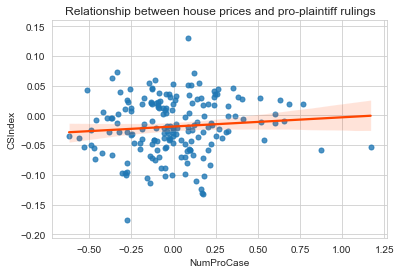

In [11]:
#Relationship between depedent and endogenous variable
sns.set_style('whitegrid')
sns.regplot('NumProCase','CSIndex',df1,scatter_kws={'s':25},line_kws={'color':'orangered'})
plt.title('Relationship between house prices and pro-plaintiff rulings')
plt.show()

In [12]:
#Test for endogenity: Is 'NumProCase' endogenous?
step_1=smf.ols(formula='NumProCase~Z1xJDPSq',data=df1).fit()
step_2=smf.ols(formula='CSIndex~NumProCase+step_1.resid',data=df1).fit()
print(step_2.summary())

                            OLS Regression Results                            
Dep. Variable:                CSIndex   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.590
Date:                Fri, 17 Jul 2020   Prob (F-statistic):             0.0778
Time:                        12:12:06   Log-Likelihood:                 300.53
No. Observations:                 183   AIC:                            -595.1
Df Residuals:                     180   BIC:                            -585.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0188      0.003     -5.380   

The coeffecient of the residuals is statistically significant at 5% which indicates that 'NumProCase' is endogenous.

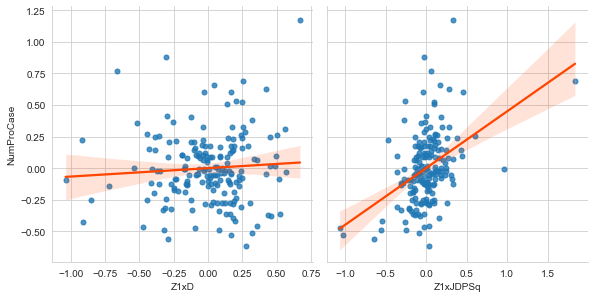

In [13]:
#Relationship between endogenous variable and instruments
sns.pairplot(df1,x_vars=['Z1xD','Z1xJDPSq'],y_vars=['NumProCase'],height=4,kind='reg',plot_kws={'line_kws':{'color':'orangered'},'scatter_kws':{'s':25}})
plt.show()

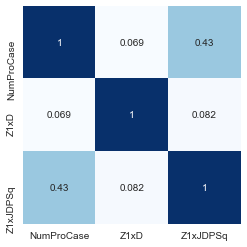

In [14]:
#Correlation between endogenous variable and instruments
sns.heatmap(df1[['NumProCase','Z1xD','Z1xJDPSq']].corr(),annot=True,cmap='Blues',cbar=False,square=True)
plt.show()

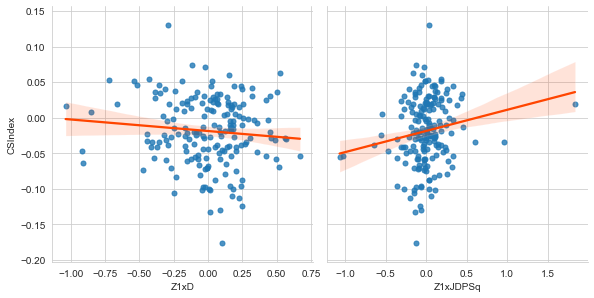

In [15]:
#Reduced form relationship between dependent variable and instruments
sns.pairplot(df1,x_vars=['Z1xD','Z1xJDPSq'],y_vars=['CSIndex'],height=4,kind='reg',plot_kws={'line_kws':{'color':'orangered'},'scatter_kws':{'s':25}})
plt.show()

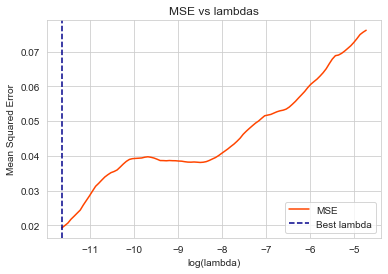

In [16]:
#MSE for different lamba(alpha) values
lambdas=np.log(select.alphas_) #a range of log lambdas 
plt.plot(lambdas,select.mse_path_.mean(axis=1),c='orangered',label='MSE') #average MSE across folds
plt.axvline(np.log(select.alpha_),ls='--',c='darkblue',label='Best lambda') #the best alpha chosen by LassoCV in log
plt.legend()
plt.xlabel('log(lambda)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs lambdas')
plt.show()

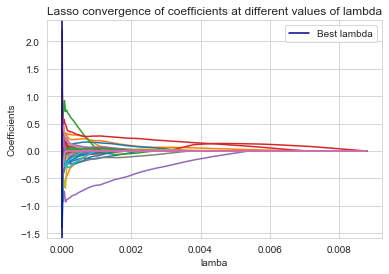

In [17]:
#Lambda vs number of coefficients convergering to zero
alphas=select.alphas_ #range of lambdas
lasso = Lasso(max_iter = 10000000,normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas,coefs)
plt.axvline(select.alpha_,ls='-',c='darkblue',label='Best lambda') #lambda chosen by lassoCV
plt.legend()
plt.xlabel('lamba')
plt.ylabel('Coefficients')
plt.title('Lasso convergence of coefficients at different values of lambda')
plt.show()

LassoCV has selected lambda that gives the least MSE. However, the lambda is very close to zero which is as good as not regularising. Since the lambda is so close to zero, the number of non-zero coeffecients selected by LassoCV is 80 among the 147.

In [18]:
#Comparing models with different instruments
IV_3=IV2SLS(df1['CSIndex'],df1['NumProCase'],None,None).fit()
s1=X.columns[select.coef_!=0]
IV_4=IV2SLS(df1['CSIndex'],None,df1['NumProCase'],df1[s1]).fit()
A['OLS']=IV_3
A['LassoCV-selected']=IV_4
print(compare(A))

                                 Model Comparison                                
                         Intuitive Lasso-selected          OLS   LassoCV-selected
---------------------------------------------------------------------------------
Dep. Variable              CSIndex        CSIndex      CSIndex            CSIndex
Estimator                  IV-2SLS        IV-2SLS          OLS            IV-2SLS
No. Observations               183            183          183                183
Cov. Est.                   robust         robust       robust             robust
R-squared                  -0.0318        -0.0704       0.0072             0.0072
Adj. R-squared             -0.0374        -0.0763       0.0018             0.0018
F-statistic                 0.0244         7.7963       1.5427             1.6872
P-value (F-stat)            0.8758         0.0052       0.2142             0.1940
==================     ===========     ==========   ==========         ==========
NumProCase      

## **4. Empirical Example 2: Estimating the Effect of Legalized Abortion on Crime** <a class="anchor" id="sec4"></a>

*Donohue and Levitt. 2001. [“The Impact of Legalized Abortion on Crime.”](https://academic.oup.com/qje/article-abstract/116/2/379/1904158?redirectedFrom=fulltext)*

---

#### **4.1. Introduction** <a class="anchor" id="sec4_1"></a>

<div style="text-align: justify">
Since 1828, a number of states in the USA have been adopting laws restricting abortions and by 1900, abortion was illegal throughout the country. Efforts to liberalize abortion laws have begun in the late 1960s and in 1973 abortion was legalized in the USA once again. In the paper by Donohue and Levitt (2001), it is found that following the legalization, the abortion rates have increased which are associated with lower crime rates two decades later. Couples choose to abort as they are least willing or unable to provide for their newborns. “Adverse family environment is strongly linked to future criminality.” Hence such newborns are prone to commit crime at some point for their livelihood. As the birthrate drops due to abortion, crime rates committed by this cohort would also be expected to fall. To find the effect of abortion rates on crime rates, authors use the following difference-in-difference type model running from 1985 to 1997. <br>
<br>
$$y_{cit}=\alpha_c a_{cit}+ w_{it}^{'}\beta_c+\delta_{ci}+\gamma_{ct}+\varepsilon_{cit}$$ 
<br>
Crime is categorized into three types: violent, property and murder. $y_{cit}$ is the crime rate for crime of type c in state i and year t; $a_{cit}$ is a measure of abortion rate relevant for crime type c in state i and year t; $ w_{it}$ is a set of control variables; $\delta_{ci}$ controls for time-invariant state-specific features and $\gamma_{ct}$ controls for time-specific national aggregate trends. 
</div>

#### **4.2. Identification**  <a class="anchor" id="sec4_2"></a>

<div style="text-align: justify">The relationship between abortion rate and crime rate is represented in the causal graph. W is the observed confounder that effects both X and Y as a result one cannot simply look at the association between X and Y for inferring causal effect. Since W is observed, we can infer the causal effect of $X \longrightarrow Y$ by controlling for W. </div>
<br>
<img src= "files/CG2.png" width =400 height=400>

#### **4.3. Empirical Strategy** <a class="anchor" id="sec4_3"></a>

<div style="text-align: justify">
To find the effect of abortion rates on crime rates, certain factors that are associated with both the state-level abortion rates and the state-level crime rates have to be controlled for to avoid omitted-variable bias. For this, the authors use eight control variables ($ w_{it}$). As a baseline estimation, the authors use first-differences model:<br>
<br>
$$\Delta y_{ci}=\alpha_c \Delta a_{ci}+\beta_c \Delta w_{i}+\Delta \gamma_{c}+\Delta \varepsilon_{ci}$$
<br>
The relevant coefficient in this model is $\alpha_c$ which tells the effect of abortion rate on crime rate. This association may be taken as causal under the assumption that all the potential confounding factors that are not controlled for in $w_{it}$ are either time-invariant ($\delta_{ci}$) or are captured by a national trend ($\gamma_{ct}$). <br>
<br>
    
|Name|Type|Definition|
|---|---|---|
|lpc_viol|Dependent|Log of violent crimes per 1000 people|
|lpc_prop|Dependent|Log of property crimes per 1000 people|
|lpc_murd|Dependent|Log of murders per 1000 people|
|efamurd|Independent|Effective abortion rate for murder|
|efaviol|Independent|Effective abortion rate for violent crimes|
|efaprop|Independent|Effective abortion rate for property crimes|
|xxprison|Control|Log of lagged prisoners per capita|
|xxpolice|Control|Log of lagged police per capita|
|xxunemp|Control|Unemployment rate|
|xxincome|Control|Per-capita income|
|xxpover|Control|Poverty rate|
|xxafdc15|Control|Aid to Families with Dependent Children (AFDC) program at time t−15|
|xxgunlaw|Control|Dummy for having a concealed weapons law|
|xxbeer|Control|Beer consumption per capita|  

The authors then allow for non-linear trends by using functional tranformations of state-specifc controls and various combinations of their interactions. They create a large set of control variables. The number of observations is 600, the number of independent and dependent variables is 6 and the number of control variables is 336. As $n(600)>p(342)$, crime rate is regressed on all the controls. Then the authors use Post-Double-Selection (PDS) Lasso to select among many controls. They obtain the non-zero controls and regress the model using only these controls. 
</div>

#### **4.4. Replication** <a class="anchor" id="sec4_4"></a>

In [19]:
df2=pd.read_csv('data/abortion.csv')
year=pd.Categorical(df2.year)
statenum=pd.Categorical(df2.statenum)
df2=df2.set_index(['statenum','year'])
df2['year']=year
df2['statenum']=statenum
df2.shape

(650, 17)

In [20]:
df2.head(15)

popul  lpc_viol  lpc_prop  lpc_murd   efamurd   efaviol  \
statenum year                                                                
1        85    3973.0000  1.532720  3.562942 -2.305862  0.000860  0.009147   
         86    3992.0000  1.734365  3.634252 -2.278332  0.001346  0.014100   
         87    4015.0000  1.738170  3.678351 -2.357621  0.005252  0.031547   
         88    4024.0000  1.745476  3.714935 -2.288764  0.009683  0.051825   
         89    4030.0000  1.797903  3.719690 -2.258889  0.022214  0.088065   
         90    4050.0000  1.955738  3.736929 -2.160143  0.045824  0.137850   
         91    4090.0000  2.132936  3.811173 -2.165698  0.081772  0.204788   
         92    4138.0000  2.164750  3.782898 -2.207670  0.132795  0.286392   
         93    4187.0000  2.054656  3.713170 -2.157655  0.201094  0.387293   
         94    4219.0000  1.922304  3.742270 -2.130747  0.285934  0.508474   
         95    4262.7300  1.841993  3.739117 -2.194350  0.394172  0.643107   
         96    4290.3999  1.728276  3.746543 -2.268311  0.518011  0.792103   
         97    4319.0000  1.730698  3.767063 -2.316340  0.657863  0.945164   
2        85     532.0000  1.740004  3.948493 -2.344818  0.008104  0.044876   
         86     544.0000  1.722635  4.020185 -2.470308  0.018418  0.078509   

                efaprop  xxprison  xxpolice  xxunemp   xxincome    xxpover  \
statenum year                                                                
1        85    0.036162  0.952666  0.762663  0.08908   9.703193  20.600000   
         86    0.055097  0.995291  0.790903  0.09833   9.745950  23.799999   
         87    0.104993  1.058402  0.818914  0.07775   9.762092  21.299999   
         88    0.163302  1.143818  0.880334  0.07208   9.781770  19.299999   
         89    0.250177  1.121946  0.941032  0.07025   9.802527  18.900000   
         90    0.355552  1.214463  0.989107  0.06775   9.814290  19.200001   
         91    0.485697  1.333375  1.031381  0.07200   9.819260  18.799999   
         92    0.634912  1.388736  1.061163  0.07300   9.845286  17.100000   
         93    0.802412  1.409347  1.064861  0.07500   9.852161  17.400000   
         94    0.988347  1.467732  1.088048  0.06000   9.879334  16.400000   
         95    1.173354  1.534553  1.100586  0.06300   9.924404  20.100000   
         96    1.361476  1.581093  1.146687  0.05100   9.940027  14.000000   
         97    1.533093  1.623693  1.179529  0.05100   9.937270  15.700000   
2        85    0.142601  0.922497  1.051474  0.09608  10.221640   8.700000   
         86    0.227305  1.056380  1.080275  0.10908  10.169600  11.400000   

                 xxafdc15  xxgunlaw     xxbeer year statenum  
statenum year                                                 
1        85     3077.6289         1  18.700001   85        1  
         86     2805.7781         1  19.299999   86        1  
         87     3455.7419         1  19.400000   87        1  
         88     3210.0000         1  19.400000   88        1  
         89     3789.4929         1  19.400000   89        1  
         90     3436.7290         1  20.100000   90        1  
         91     3486.4319         1  20.100000   91        1  
         92     3591.3860         1  20.400000   92        1  
         93     3308.4661         1  20.299999   93        1  
         94     2944.7109         1  21.000000   94        1  
         95     2571.1160         1  20.600000   95        1  
         96     2245.9409         1  21.000000   96        1  
         97     2175.4819         1  20.799999   97        1  
2        85     9481.0830         0  27.400000   85        2  
         86    10272.0000         0  27.700001   86        2

**First-difference estimation**

In [21]:
from linearmodels.panel import compare
exog_viol=['efaviol','xxprison','xxpolice','xxunemp','xxincome','xxpover','xxafdc15','xxgunlaw','xxbeer','year'] #independent and control variables for violent crime
FD1=FirstDifferenceOLS(df2['lpc_viol'],df2[exog_viol]).fit(cov_type='clustered',cluster_entity=True)
exog_prop=['efaprop','xxprison','xxpolice','xxunemp','xxincome','xxpover','xxafdc15','xxgunlaw','xxbeer','year'] #independent and control variables for property crime
FD2=FirstDifferenceOLS(df2['lpc_prop'],df2[exog_prop]).fit(cov_type='clustered',cluster_entity=True)
exog_murd=['efamurd','xxprison','xxpolice','xxunemp','xxincome','xxpover','xxafdc15','xxgunlaw','xxbeer','year'] #independent and control variables for murder
FD3=FirstDifferenceOLS(df2['lpc_murd'],df2[exog_murd]).fit(cov_type='clustered',cluster_entity=True)
print(compare({'Violent':FD1,'Property':FD2,'Murder':FD3}))

                                  Model Comparison                                  
                                   Violent             Property               Murder
------------------------------------------------------------------------------------
Dep. Variable                     lpc_viol             lpc_prop             lpc_murd
Estimator               FirstDifferenceOLS   FirstDifferenceOLS   FirstDifferenceOLS
No. Observations                       600                  600                  600
Cov. Est.                        Clustered            Clustered            Clustered
R-squared                           0.2797               0.2281               0.0741
R-Squared (Within)                  0.4848               0.3641               0.0909
R-Squared (Between)                 0.2386              -0.1329              -29.426
R-Squared (Overall)                 0.2405              -0.1327              -29.286
F-statistic                         10.708               8.1471  

First differences produce valid estimates if and only if factors that are correlated to both abortion and crime rates are controlled for by the small set of control features used $(w_{it})$. To alleviate this concern, authors allow for nonlinear trends interacted with observed state-specific features and this introduces many controls into the regression. The authors transform the previous 14 variables to get as many as 342 variables. I use a new data set with all the transformed variables to carry out the regressions. 

In [22]:
df3=pd.read_csv('data/abort_transform.csv')
year=pd.Categorical(df3.year)
statenum=pd.Categorical(df3.statenum)
df3=df3.set_index(['statenum','year'])
df3['year']=year
df3['statenum']=statenum
df3.shape

(600, 344)

In [23]:
#STATA automatically drops multicollinear variables from the regression. 
#To get identical results, these multicollinear variables have to be dropped from the regression.
mc=['dxxgunlaw2','lxxgunlaw2','dxxgunlaw0','xxgunlaw02','dxxgunlaw2xt','dxxgunlaw2xt2','dxxincomexdxxgunlawxt','dxxincomexdxxgunlawxt2','lxxgunlawxt',
      'lxxincome2xt','lxxgunlaw2xt2','mxxincome2xt','mxxincome2xt2','xxgunlaw0xt','xxgunlaw0xt2','dxxgunlaw0xt','dxxgunlaw0xt2','xxincome02xt']
cntrl=df3.iloc[:,0:300]
ctrl=cntrl.drop(mc,axis=1) #control variables
ctrl.shape

(600, 282)

**Regressing on all the controls**

In [24]:
viol_ctrl=df3.iloc[:,301:313] #violent crime-specific control variables
rslt_viol=smf.ols(formula='dyviol~dviol+viol_ctrl+ctrl+year',data=df3).fit(cov_type='cluster',cov_kwds={'groups':df3['statenum']})
prop_ctrl=df3.iloc[:,314:326] #property crime-specific control variables
rslt_prop=smf.ols(formula='dyprop~dprop+prop_ctrl+ctrl+year',data=df3).fit(cov_type='cluster',cov_kwds={'groups':df3['statenum']})
murd_ctrl=df3.iloc[:,327:339] #murder crime-specific control variables
rslt_murd=smf.ols(formula='dymurd~dmurd+murd_ctrl+ctrl+year',data=df3).fit(cov_type='cluster',cov_kwds={'groups':df3['statenum']})
rslt=summary_col(results=[rslt_viol,rslt_prop,rslt_murd],float_format='%0.2f',stars = True, 
                 model_names=['Violence','Property','Murder'],regressor_order=['dviol','dprop','dmurd'])
print(rslt)


                 Violence     Property      Murder   
-----------------------------------------------------
dviol         0.07                                   
              (0.28)                                 
dprop                       -0.16                    
                            (0.11)                   
dmurd                                    -1.33       
                                         (0.93)      
Intercept     39.11         29.85        -230.14     
              (46.56)       (40.01)      (244.74)    
R-squared     0.36          0.34         -0.14       
              0.69          0.68         0.44        
ctrl[0]       -1.13         -0.26        -3.17       
              (0.73)        (0.46)       (2.05)      
ctrl[100]     -0.61         42.33**      -97.90      
              (26.55)       (16.91)      (83.07)     
ctrl[101]     2.95          -45.89***    122.21      
              (23.18)       (15.31)      (76.70)     
ctrl[102]     -427.26      

**Lasso selection among many controls**

In [25]:
#LASSO to select among controls for violent crime
dummy=pd.get_dummies(df3['year'])
x_viol=pd.concat([cntrl,viol_ctrl,dummy],axis=1)
x_viol.shape

(600, 324)

In [26]:
#PDS LASSO Step 1:
viol_1 = LassoCV(max_iter = 1000000,normalize = True).fit(x_viol,df3["dyviol"])
viol1 = x_viol.columns[viol_1.coef_ != 0]
#PDS LASSO Step 3:
viol_2 = LassoCV(max_iter = 100000,normalize = True).fit(x_viol,df3["dviol"])
viol2 = x_viol.columns[viol_2.coef_ != 0]
#Union of variables selected from previous steps
print('Non-zero coefficients for violent crime:',viol1.union(viol2))

Non-zero coefficients for violent crime: Index([                      86,                       87,
                             88,                       90,
                             91,                       92,
                             93,                       94,
                             96,                       97,
                   'dviol02xt2',           'dxxafdc150xt',
                 'dxxafdc15xt2',             'dxxbeer0xt',
         'dxxgunlawxdxxbeerxt2',           'dxxincome0xt',
       'dxxincomexdxxafdc15xt2', 'dxxpolicexdxxafdc15xt2',
        'dxxpolicexdxxincomext',  'dxxpolicexdxxunempxt2',
                  'dxxpover0xt',           'dxxpover0xt2',
                   'dxxprison0',           'dxxprison2xt',
            'dxxprisonxdxxbeer', 'dxxprisonxdxxpolicext2',
        'dxxprisonxdxxpoverxt2',     'dxxprisonxdxxunemp',
         'dxxprisonxdxxunempxt',               'dxxunemp',
                  'dxxunemp2xt',  'dxxunempxdxxgunlawxt2',
               

In [27]:
#LASSO to select among controls for property crime
x_prop = pd.concat([cntrl,prop_ctrl,dummy],axis = 1)
x_prop.shape

(600, 324)

In [28]:
#PDS LASSO Step 1:
prop_1 = LassoCV(max_iter = 1000000,normalize = True).fit(x_prop,df3["dyprop"])
prop1 = x_prop.columns[viol_1.coef_ != 0]
#PDS LASSO Step 3:
prop_2 = LassoCV(max_iter=100000,normalize = True).fit(x_prop,df3["dprop"])
prop2 = x_prop.columns[viol_2.coef_ != 0]
#Union of variables selected from previous steps
print('Non-zero coefficients for property crime:',prop1.union(prop2))

Non-zero coefficients for property crime: Index([                      86,                       87,
                             88,                       90,
                             91,                       92,
                             93,                       94,
                             96,                       97,
                   'dprop02xt2',           'dxxafdc150xt',
                 'dxxafdc15xt2',             'dxxbeer0xt',
         'dxxgunlawxdxxbeerxt2',           'dxxincome0xt',
       'dxxincomexdxxafdc15xt2', 'dxxpolicexdxxafdc15xt2',
        'dxxpolicexdxxincomext',  'dxxpolicexdxxunempxt2',
                  'dxxpover0xt',           'dxxpover0xt2',
                   'dxxprison0',           'dxxprison2xt',
            'dxxprisonxdxxbeer', 'dxxprisonxdxxpolicext2',
        'dxxprisonxdxxpoverxt2',     'dxxprisonxdxxunemp',
         'dxxprisonxdxxunempxt',               'dxxunemp',
                  'dxxunemp2xt',  'dxxunempxdxxgunlawxt2',
              

In [29]:
#LASSO to select among controls for murder
x_murd = pd.concat([cntrl,murd_ctrl,dummy],axis = 1)
x_murd.shape

(600, 324)

In [30]:
#PDS LASSO Step 1:
murd_1 = LassoCV(max_iter = 10000000,normalize = True).fit(x_murd,df3["dymurd"])
murd1 = x_murd.columns[murd_1.coef_ != 0]
#PDS LASSO Step 3:
murd_2 = LassoCV(max_iter = 10000000,normalize = True).fit(x_murd,df3["dmurd"])
murd2 = x_murd.columns[murd_2.coef_ != 0]
#Union of variables selected from previous steps
print('Non-zero coefficients for murder:',murd1.union(murd2))

Non-zero coefficients for murder: Index([                      87,                       88,
                             89,                       90,
                             92,                       93,
                             94,                       95,
                             97,             'dmurd02xt2',
                    'dmurd0xt2',           'dxxafdc150xt',
                'dxxafdc150xt2',             'dxxafdc152',
         'dxxafdc15xdxxbeerxt2',           'dxxafdc15xt2',
                  'dxxbeer0xt2',           'dxxincome0xt',
                'dxxincome0xt2',             'dxxincome2',
                 'dxxincome2xt',          'dxxincome2xt2',
        'dxxincomexdxxafdc15xt', 'dxxincomexdxxafdc15xt2',
         'dxxincomexdxxbeerxt2',  'dxxincomexdxxpoverxt2',
                  'dxxincomext',           'dxxincomext2',
                    'dxxpolice',           'dxxpolice0xt',
          'dxxpolicexdxxafdc15',  'dxxpolicexdxxincomext',
        'dxxpolicexdxx

Due to the same reasons as mentioned previously LassoCV doesn't obtain the same non-zero coefficients as the authors. Hence I use the ones obtained by them to carry out further replications.

**Regressing on Lasso-selected controls**

In [31]:
sel_viol=df3[['viol0','lxxprison','lxxpolice','mxxincome','dxxincome0','lxxpolicext','mxxincomext','dxxincome0xt','dxxbeer0xt']] #LASSO-selected controls for violent crime
sel_rslt_viol= smf.ols(formula="dyviol ~ dviol+sel_viol+year", data=df3).fit(cov_type='cluster',cov_kwds={'groups':df3['statenum']})
sel_prop=df3[['mxxincome2xt2','xxincome02xt2','prop0','lxxprison','lxxpolice','lxxincome','mxxincome','dxxincome0','dxxincome0xt']] #LASSO-selected controls for property crime
sel_rslt_prop= smf.ols(formula="dyprop ~ dprop+sel_prop+year", data=df3).fit(cov_type='cluster',cov_kwds={'groups':df3['statenum']})
sel_murd=df3[['murd0','murd0xt','lxxprison','lxxprisonxt','lxxpolicext','mxxincomext','dxxincome0xt']]
sel_rslt_murd= smf.ols(formula="dymurd ~ dmurd+sel_murd+year", data=df3).fit(cov_type='cluster',cov_kwds={'groups':df3['statenum']}) #LASSO-selected controls for murder
sel_rslt=summary_col(results=[sel_rslt_viol,sel_rslt_prop,sel_rslt_murd],float_format='%0.2f',stars = True, 
                 model_names=['Violence','Property','Murder'],regressor_order=['dviol','dprop','dmurd'])
print(sel_rslt)


            Violence  Property  Murder
--------------------------------------
dviol       -0.17                     
            (0.12)                    
dprop                -0.06            
                     (0.06)           
dmurd                          -0.19  
                               (0.18) 
Intercept   -0.45    0.24      0.05   
            (0.59)   (0.21)    (0.06) 
R-squared   0.24     0.24      0.02   
            0.27     0.26      0.05   
sel_murd[0]                    2.65** 
                               (1.20) 
sel_murd[1]                    -3.88* 
                               (2.26) 
sel_murd[2]                    0.00   
                               (0.03) 
sel_murd[3]                    0.01   
                               (0.05) 
sel_murd[4]                    -0.07  
                               (0.05) 
sel_murd[5]                    1.03   
                               (6.41) 
sel_murd[6]                    -16.44 
                        

#### **4.5. Additional** <a class="anchor" id="sec4_5"></a>

In [32]:
#Grouped mean of main variables
df2=pd.read_csv('data/abortion.csv')
year=pd.Categorical(df2.year)
ss=df2[['lpc_viol', 'lpc_prop', 'lpc_murd', 'efamurd', 'efaviol','efaprop','year']].groupby([year]).mean()
ss

,lpc_viol,lpc_prop,lpc_murd,efamurd,efaviol,efaprop,year
85,1.307324,3.737041,-2.907164,0.003495,0.026544,0.096070,85
86,1.365220,3.775390,-2.843440,0.006928,0.042538,0.144378,86
87,1.340429,3.792991,-2.873296,0.017548,0.078211,0.235967,87
88,1.378845,3.791101,-2.877808,0.033842,0.125633,0.350516,88
89,1.414313,3.800441,-2.881407,0.065737,0.198317,0.504555,89
90,1.502233,3.811853,-2.837921,0.119142,0.293564,0.682262,90
91,1.540475,3.825710,-2.816060,0.196096,0.412495,0.880173,91
92,1.556427,3.786141,-2.851967,0.297325,0.545894,1.081739,92
93,1.562769,3.757106,-2.772025,0.420170,0.693361,1.279690,93
94,1.543884,3.756578,-2.888573,0.556754,0.850454,1.468491,94


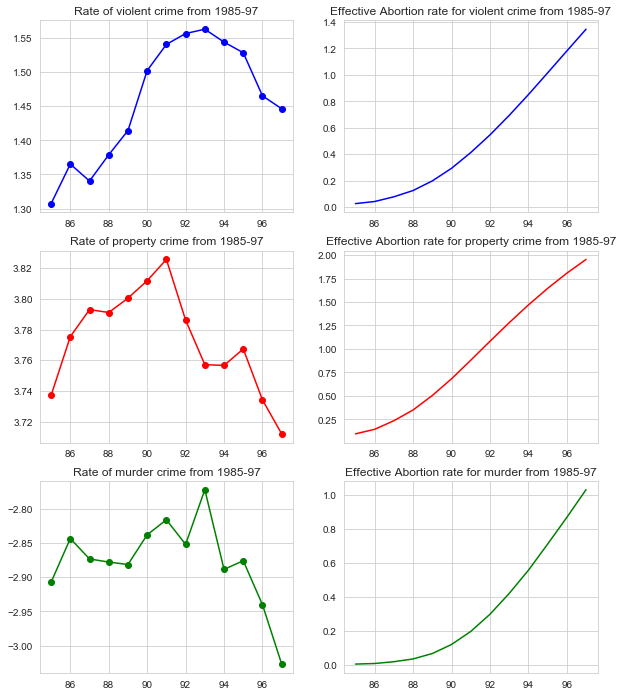

In [33]:
#plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(3, 2,figsize=(10, 12))
axs[0, 0].plot('year', 'lpc_viol', data=ss, color='blue', marker='o',linestyle = '-')
axs[0, 0].set_title('Rate of violent crime from 1985-97')
axs[0, 1].plot('year', 'efaviol', data=ss, color='blue',linestyle = '-')
axs[0, 1].set_title('Effective Abortion rate for violent crime from 1985-97')
axs[1, 0].plot('year', 'lpc_prop', data=ss, color='red', marker='o',linestyle = '-')
axs[1, 0].set_title('Rate of property crime from 1985-97')
axs[1, 1].plot('year', 'efaprop', data=ss, color='red',linestyle = '-')
axs[1, 1].set_title('Effective Abortion rate for property crime from 1985-97')
axs[2, 0].plot('year', 'lpc_murd', data=ss, color='green', marker='o',linestyle = '-')
axs[2, 0].set_title('Rate of murder crime from 1985-97')
axs[2, 1].plot('year', 'efamurd', data=ss, color='green',linestyle = '-')
axs[2, 1].set_title('Effective Abortion rate for murder from 1985-97')
plt.show()

Correlation between abortion rate and violent crime: -0.26569847200620617


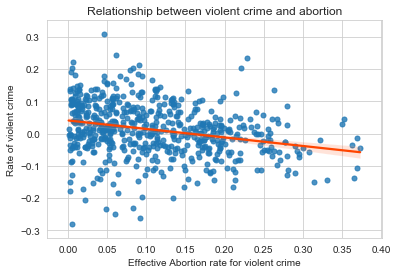

In [34]:
sns.regplot('dviol','dyviol',df3,scatter_kws={'s':25},line_kws={'color':'orangered'})
plt.title('Relationship between violent crime and abortion')
plt.xlabel('Effective Abortion rate for violent crime')
plt.ylabel('Rate of violent crime')
print('Correlation between abortion rate and violent crime:', stats.pearsonr(df3['dviol'],df3['dyviol'])[0])

Correlation between abortion rate and property crime: -0.25625418872880146


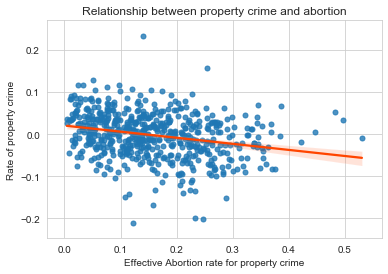

In [35]:
sns.regplot('dprop','dyprop',df3,scatter_kws={'s':25},line_kws={'color':'orangered'})
plt.title('Relationship between property crime and abortion')
plt.xlabel('Effective Abortion rate for property crime')
plt.ylabel('Rate of property crime')
print('Correlation between abortion rate and property crime:', stats.pearsonr(df3['dprop'],df3['dyprop'])[0])

Correlation between abortion rate and murder crime: -0.10287995338721305


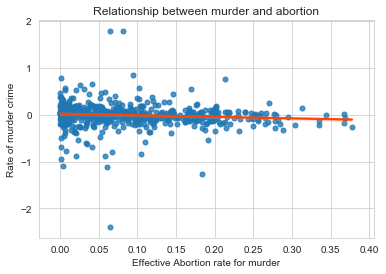

In [36]:
sns.regplot('dmurd','dymurd',df3,scatter_kws={'s':25},line_kws={'color':'orangered'})
plt.title('Relationship between murder and abortion')
plt.xlabel('Effective Abortion rate for murder')
plt.ylabel('Rate of murder crime')
print('Correlation between abortion rate and murder crime:', stats.pearsonr(df3['dmurd'],df3['dymurd'])[0])

In [37]:
def var_inf(X):
    vif = pd.DataFrame() 
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [38]:
print(var_inf(df3[mc]))

                 variables           VIF
0               dxxgunlaw2     56.816977
1               lxxgunlaw2    359.153288
2               dxxgunlaw0           NaN
3               xxgunlaw02    200.386781
4             dxxgunlaw2xt    460.792334
5            dxxgunlaw2xt2    245.633758
6    dxxincomexdxxgunlawxt    249.148335
7   dxxincomexdxxgunlawxt2    261.101928
8              lxxgunlawxt   1591.105193
9             lxxincome2xt  43768.998085
10           lxxgunlaw2xt2    572.507999
11            mxxincome2xt  76567.366811
12           mxxincome2xt2     71.828771
13             xxgunlaw0xt    700.710587
14            xxgunlaw0xt2    239.032842
15            dxxgunlaw0xt           NaN
16           dxxgunlaw0xt2           NaN
17            xxincome02xt  18139.729780


/Users/satwika/opt/anaconda3/envs/student_project/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [39]:
print(var_inf(sel_prop))

       variables            VIF
0  mxxincome2xt2   40426.835697
1  xxincome02xt2   39618.315790
2          prop0       2.095797
3      lxxprison       5.278472
4      lxxpolice      42.426008
5      lxxincome  142508.256320
6      mxxincome  140703.476427
7     dxxincome0      11.933428
8   dxxincome0xt      17.044205


In [40]:
print(var_inf(sel_murd))

      variables        VIF
0         murd0   5.399218
1       murd0xt   5.521298
2     lxxprison   8.186283
3   lxxprisonxt  13.140236
4   lxxpolicext  39.056375
5   mxxincomext  32.859495
6  dxxincome0xt   2.783443


In [41]:
print(var_inf(sel_viol))

      variables         VIF
0         viol0    1.811435
1     lxxprison    5.729080
2     lxxpolice  171.346460
3     mxxincome  169.684755
4    dxxincome0   12.382891
5   lxxpolicext  145.490751
6   mxxincomext  152.874251
7  dxxincome0xt   12.364311
8    dxxbeer0xt    1.404700


## **5. Empirical Example 3: Estimating the Effect of Institutions on Output** <a class="anchor" id="sec5"></a>

*Acemoglu, Johnson, and Robinson. 2001. [“The Colonial Origins of Comparative Development: An Empirical Investigation.”](https://www.aeaweb.org/articles?id=10.1257/aer.91.5.1369)*

---

#### **5.1. Introduction** <a class="anchor" id="sec5_1"></a>

#### **5.2. Identification** <a class="anchor" id="sec5_2"></a>

#### **5.3. Empirical Strategy** <a class="anchor" id="sec5_3"></a>

#### **5.4. Replication** <a class="anchor" id="sec5_4"></a>

In [42]:
df4=pd.read_csv("data/institutions.csv")
df4.shape

(64, 21)

In [43]:
df4.head()

,gdp,exprop,mort,latitude,neo,africa,asia,namer,samer,lnmort,...,lat3,lat_c08,lat2_c08,lat3_c08,lat_c16,lat2_c16,lat3_c16,lat_c24,lat2_c24,lat3_c24
0,8.39,6.50,78.199997,0.3111,0,1,0,0,0,4.359270,...,0.030109,0.2311,0.053407,0.012342,0.1511,0.022831,0.003450,0.0711,0.005055,0.000359
1,7.77,5.36,280.000000,0.1367,0,1,0,0,0,5.634790,...,0.002554,0.0567,0.003215,0.000182,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000
2,9.13,6.39,68.900002,0.3778,0,0,0,0,1,4.232656,...,0.053924,0.2978,0.088685,0.026410,0.2178,0.047437,0.010332,0.1378,0.018989,0.002617
3,9.90,9.32,8.550000,0.3000,1,0,0,0,0,2.145931,...,0.027000,0.2200,0.048400,0.010648,0.1400,0.019600,0.002744,0.0600,0.003600,0.000216
4,9.29,7.50,85.000000,0.2683,0,0,0,1,0,4.442651,...,0.019314,0.1883,0.035457,0.006677,0.1083,0.011729,0.001270,0.0283,0.000801,0.000023


**TSLS estimation with one control variable**

In [44]:
#2SLS estimation with latitude as the control
formula_1 = 'gdp ~ 1 + latitude + [exprop ~ lnmort]'
IV_5 = IV2SLS.from_formula(formula_1, df4).fit()
print(IV_5.first_stage)

    First Stage Estimation Results    
                                exprop
--------------------------------------
R-squared                       0.3015
Partial R-squared               0.2071
Shea's R-squared                0.2071
Partial F-statistic             12.684
P-value (Partial F-stat)        0.0004
Partial F-stat Distn           chi2(1)
========================== ===========
Intercept                       8.6660
                              (10.998)
latitude                        1.8177
                              (1.7539)
lnmort                         -0.5372
                             (-3.5615)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


**TSLS estimation with all control variables**

In [45]:
formula_2 = 'gdp ~ 1 + [exprop ~ lnmort] + africa + asia + namer + samer +latitude + lat2 + lat3 + lat_c08 + lat2_c08 + lat3_c08 + lat_c16 + lat2_c16 + lat3_c16 + lat_c24 + lat2_c24 + lat3_c24'
IV_6 = IV2SLS.from_formula(formula_2, df4).fit()
print(IV_6.first_stage)

     First Stage Estimation Results    
                                 exprop
---------------------------------------
R-squared                        0.5180
Partial R-squared                0.0250
Shea's R-squared                 0.0250
Partial F-statistic              1.3430
P-value (Partial F-stat)         0.2465
Partial F-stat Distn            chi2(1)
========================== ============
Intercept                        5.9792
                               (4.8960)
africa                          -1.0493
                              (-1.0317)
asia                            -0.3362
                              (-0.3265)
namer                           -0.6062
                              (-0.6114)
samer                           -0.9126
                              (-0.9691)
latitude                         258.37
                               (4.6603)
lat2                            -6117.1
                              (-3.2312)
lat3                          4.083e+04


**Lasso selection among many controls**

In [46]:
controls =df4[['africa','asia','namer','samer','latitude','lat2','lat3','lat_c08','lat2_c08','lat3_c08','lat_c16','lat2_c16','lat3_c16','lat_c24','lat2_c24','lat3_c24']]
#PDS LASSO: Regressing outcome variable on controls 
out_sel= LassoCV(max_iter=100000,normalize=True).fit(controls,df4["gdp"])
col1=controls.columns[out_sel.coef_!=0]
#PDS LASSO: Regressing endogenous variable on controls 
endo_sel = LassoCV(max_iter=1000000,normalize=True).fit(controls,df4["exprop"])
col2=controls.columns[endo_sel.coef_!=0]
#PDS LASSO: Regressing instrumental variable on controls 
inst_sel = LassoCV(max_iter=100000,normalize=True).fit(controls,df4["lnmort"])
col3=controls.columns[inst_sel.coef_!=0]
#Union of variables selected from previous steps
s3 = col1.union(col2).union(col3) 
print('Non-zero coefficients:', s3)

Non-zero coefficients: Index(['africa', 'asia', 'lat2_c16', 'lat2_c24', 'lat3_c24', 'lat_c08',
       'lat_c16', 'lat_c24', 'latitude', 'namer', 'samer'],
      dtype='object')


Due to the same reasons as mentioned previously LassoCV doesn't obtain the same non-zero coefficients as the authors. Hence I use the ones obtained by them to carry out further replications.

**TSLS estimation with Lasso-selected control variable**

In [47]:
formula_3 = 'gdp ~ 1 + africa + [exprop ~ lnmort]'
IV_7 = IV2SLS.from_formula(formula_3, df4).fit()
print(IV_5.first_stage)

    First Stage Estimation Results    
                                exprop
--------------------------------------
R-squared                       0.3015
Partial R-squared               0.2071
Shea's R-squared                0.2071
Partial F-statistic             12.684
P-value (Partial F-stat)        0.0004
Partial F-stat Distn           chi2(1)
========================== ===========
Intercept                       8.6660
                              (10.998)
latitude                        1.8177
                              (1.7539)
lnmort                         -0.5372
                             (-3.5615)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


In [48]:
from linearmodels.iv.results import compare
B=OrderedDict()
B['Single']=IV_5
B['All controls']=IV_6
B['Lasso-selected']=IV_7
print(compare(B))

                        Model Comparison                        
                            Single   All controls Lasso-selected
----------------------------------------------------------------
Dep. Variable                  gdp            gdp            gdp
Estimator                  IV-2SLS        IV-2SLS        IV-2SLS
No. Observations                64             64             64
Cov. Est.                   robust         robust         robust
R-squared                   0.1523         0.4147         0.4527
Adj. R-squared              0.1245         0.1984         0.4347
F-statistic                 28.979         132.39         53.888
P-value (F-stat)         5.096e-07         0.0000      1.988e-12
==================     ===========   ============    ===========
Intercept                   1.8744         3.1153         3.2056
                          (1.4604)       (0.8545)       (2.3744)
latitude                   -0.6696        -138.09               
                         

#### **5.5. Additional** <a class="anchor" id="sec5_5"></a>

Correlation between Institutions and Output: 0.7346784953692491


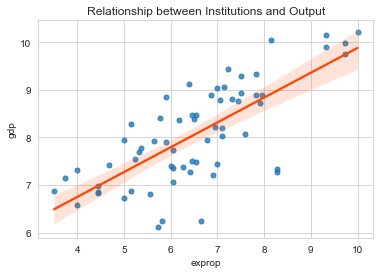

In [49]:
#Relationship between dependent and endogenous variable
sns.regplot('exprop','gdp',df4,scatter_kws={'s':25},line_kws={'color':'orangered'})
plt.title('Relationship between Institutions and Output')
print('Correlation between Institutions and Output:', stats.pearsonr(df4['exprop'],df4['gdp'])[0])

Correlation between Mortality Rate and Institutions: -0.5229775754371839


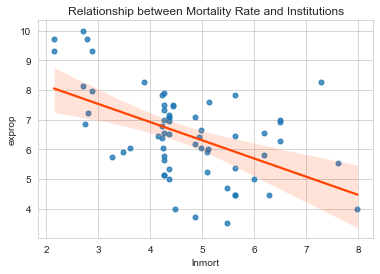

In [50]:
#Relationship between endogenous variable and instrument
sns.regplot('lnmort','exprop',df4,scatter_kws={'s':25},line_kws={'color':'orangered'})
plt.title('Relationship between Mortality Rate and Institutions')
print('Correlation between Mortality Rate and Institutions:', stats.pearsonr(df4['exprop'],df4['lnmort'])[0])

Correlation between Mortality Rate and Output: -0.6797166760110136


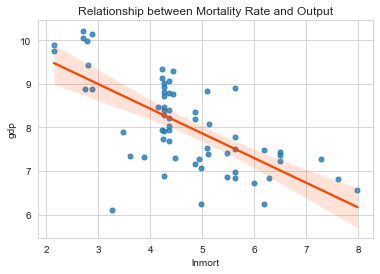

In [51]:
#Reduced form relationship between dependent variable and instrument
sns.regplot('lnmort','gdp',df4,scatter_kws={'s':25},line_kws={'color':'orangered'})
plt.title('Relationship between Mortality Rate and Output')
print('Correlation between Mortality Rate and Output:', stats.pearsonr(df4['lnmort'],df4['gdp'])[0])

In [52]:
#Grouped mean of GDP by region
region=['neo', 'africa', 'asia', 'namer','samer']
output = pd.DataFrame([df4.groupby(i).gdp.mean() for i in region])
output['region'] = region
output

,0,1,region
gdp,7.935500,9.967500,neo
gdp,8.590541,7.338889,africa
gdp,8.041273,8.192222,asia
gdp,7.919800,8.572143,namer
gdp,7.943019,8.638182,samer


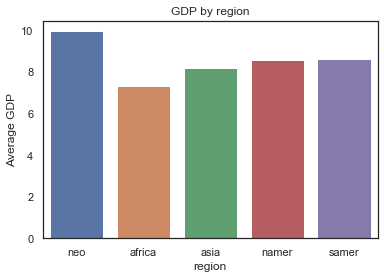

In [53]:
sns.set(style="white")
sns.barplot(x='region',y=1,data=output)
plt.title('GDP by region')
plt.ylabel('Average GDP')
plt.show()

In [54]:
#Grouped mean of Expropriation risk by region
eprop = pd.DataFrame([df4.groupby(i).exprop.mean() for i in region])
eprop['region'] = region
eprop

,0,1,region
exprop,6.304167,9.695000,neo
exprop,6.984054,5.874815,africa
exprop,6.402000,7.213333,asia
exprop,6.484000,6.630714,namer
exprop,6.465094,6.761818,samer


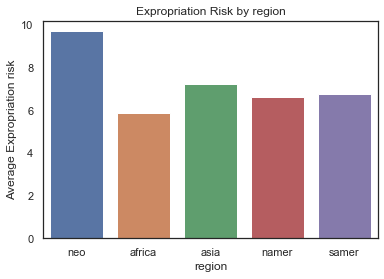

In [55]:
sns.barplot(x='region',y=1,data=eprop)
plt.title('Expropriation Risk by region')
plt.ylabel('Average Expropriation risk')
plt.show()

In [56]:
#Grouped mean of Mortality Rate by region
mort = pd.DataFrame([df4.groupby(i).lnmort.mean() for i in region])
mort['region'] = region
mort

,0,1,region
lnmort,4.793553,2.444683,neo
lnmort,4.016538,5.510371,africa
lnmort,4.779219,3.837210,asia
lnmort,4.732533,4.340378,namer
lnmort,4.738929,4.202611,samer


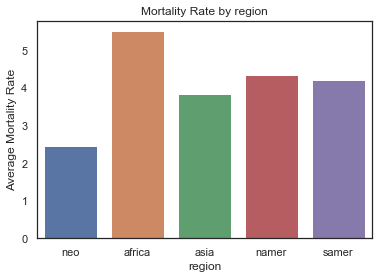

In [57]:
sns.barplot(x='region',y=1,data=mort)
plt.title('Mortality Rate by region')
plt.ylabel('Average Mortality Rate')
plt.show()

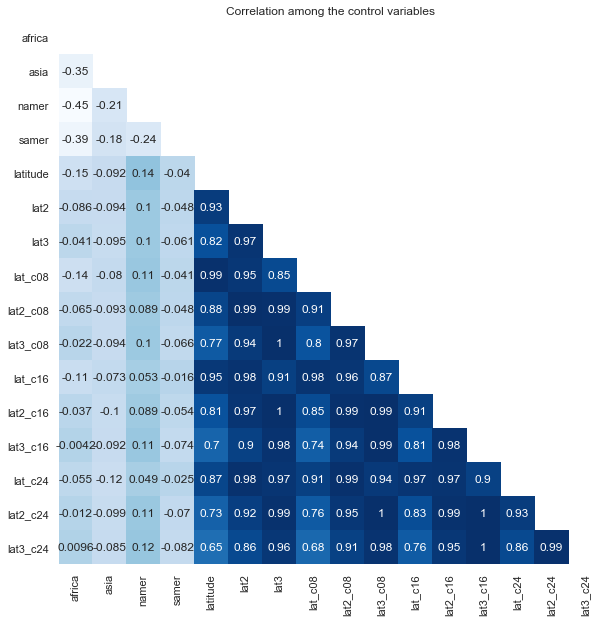

In [58]:
plt.figure(figsize = (20,10))
matrix = np.triu(controls.corr())
sns.heatmap(controls.corr(),annot=True,cmap='Blues',cbar=False,square=True,mask=matrix)
plt.title('Correlation among the control variables')
plt.show()

In [59]:
#Test for endogenity: Is 'exprop' endogenous?
stp_1=smf.ols(formula='exprop~lnmort',data=df4).fit()
stp_2=smf.ols(formula='gdp~exprop+stp_1.resid',data=df4).fit()
print(stp_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     59.19
Date:                Fri, 17 Jul 2020   Prob (F-statistic):           5.16e-15
Time:                        12:23:40   Log-Likelihood:                -58.529
No. Observations:                  64   AIC:                             123.1
Df Residuals:                      61   BIC:                             129.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0448      0.666      3.072      

In [60]:
IV_8=IV2SLS(df4['gdp'],df4['exprop'],None,None).fit()
IV_9=IV2SLS(df4['gdp'],df4[s3],df4['exprop'],df4['lnmort']).fit()
B['OLS']=IV_8
B['LassoCV-selected']=IV_9
print(compare(B))

                                       Model Comparison                                       
                            Single   All controls Lasso-selected          OLS LassoCV-selected
----------------------------------------------------------------------------------------------
Dep. Variable                  gdp            gdp            gdp          gdp              gdp
Estimator                  IV-2SLS        IV-2SLS        IV-2SLS          OLS          IV-2SLS
No. Observations                64             64             64           64               64
Cov. Est.                   robust         robust         robust       robust           robust
R-squared                   0.1523         0.4147         0.4527       0.9769           0.9785
Adj. R-squared              0.1245         0.1984         0.4347       0.9765           0.9735
F-statistic                 28.979         132.39         53.888       2894.6           3849.9
P-value (F-stat)         5.096e-07         0.0000 

## **6. Conclusion**
---

## **7. References**
---